[0. 1. 1. 0.]
[0 1 1 0]
Weights: [ 2.5026503   2.5026503  -1.84134719]
Input:[0 0], Predicted: 0.0
Input:[0 1], Predicted: 1.0
Input:[1 0], Predicted: 1.0
Input:[1 1], Predicted: 0.0


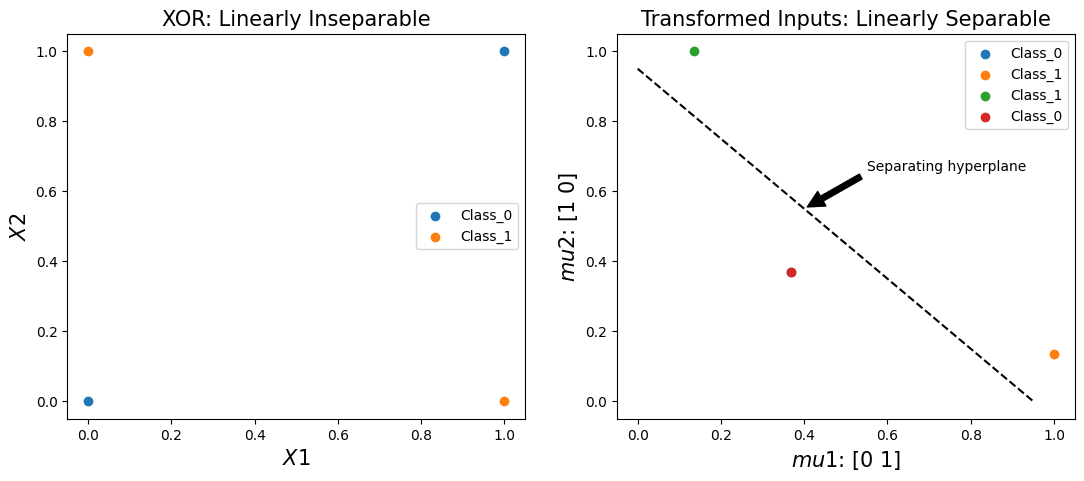

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def gaussian_rbf(x, landmark, gamma=1):
  return np.exp(-gamma * np.linalg.norm(x - landmark)**2)
def end_to_end(X1,X2,ys,mu1,mu2):
  from_1 = [gaussian_rbf(i, mu1) for i in zip(X1, X2)]
  from_2 = [gaussian_rbf(i, mu2) for i in zip(X1, X2)]

  plt.figure(figsize=(13, 5))
  plt.subplot(1, 2, 1)
  plt.scatter((x1[0], x1[3]),(x2[0], x2[3]), label="Class_0")
  plt.scatter((x1[1], x1[2]),(x2[1], x2[2]), label="Class_1")
  plt.xlabel("$X1$", fontsize=15)
  plt.ylabel("$X2$", fontsize=15)
  plt.title("XOR: Linearly Inseparable", fontsize=15)
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.scatter(from_1[0], from_2[0], label="Class_0")
  plt.scatter(from_1[1], from_2[1], label="Class_1")
  plt.scatter(from_1[2], from_2[2], label="Class_1")
  plt.scatter(from_1[3], from_2[3], label="Class_0")
  plt.plot([0, 0.95],[0.95, 0],"k--")
  plt.annotate("Separating hyperplane",xy=(0.4, 0.55), xytext=(0.55, 0.66),arrowprops=dict(facecolor='black', shrink=0.05))
  plt.xlabel(f"$mu1$: {(mu1)}", fontsize=15)
  plt.ylabel(f"$mu2$: {(mu2)}", fontsize=15)
  plt.title("Transformed Inputs: Linearly Separable", fontsize=15)
  plt.legend()

  A=[]

  for i, j in zip(from_1, from_2):
    temp = []
    temp.append(i)
    temp.append(j)
    temp.append(1)
    A.append(temp)

  A = np.array(A)
  W = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(ys)
  print(np.round(A.dot(W)))
  print(ys)
  print(f"Weights: {W}")
  return W

def predict_matrix(point,weights):
  gaussian_rbf_0 = gaussian_rbf(np.array(point), mu1)
  gaussian_rbf_1 = gaussian_rbf(np.array(point), mu2)
  A = np.array([gaussian_rbf_0, gaussian_rbf_1, 1])
  return np.round(A.dot(weights))

x1 = np.array([0, 0, 1, 1])
x2 = np.array([0, 1, 0, 1])
ys = np.array([0, 1, 1, 0])

mu1 = np.array([0, 1])
mu2 = np.array([1, 0])
w = end_to_end(x1,x2,ys,mu1,mu2)

print(f"Input:{np.array([0,0])}, Predicted: {predict_matrix(np.array([0,0]),w)}")
print(f"Input:{np.array([0,1])}, Predicted: {predict_matrix(np.array([0,1]),w)}")
print(f"Input:{np.array([1,0])}, Predicted: {predict_matrix(np.array([1,0]),w)}")
print(f"Input:{np.array([1,1])}, Predicted: {predict_matrix(np.array([1,1]),w)}")
